In [6]:
#Cargar Las Librerias Necesarias

import pandas as pd # Manaejo y analisisi de estructura de datos
import numpy as np # Calculo numérico y el analisis de datps
import seaborn as sns # Creación Graficos estadisticos
import matplotlib.pyplot as plt # Creación de graficos en dos dimensiones
import plotly.graph_objs as go #Creación Graficos en tres dimensiones
import plotly.express as px
import plotly.express as px

#Librerias para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import cophenet
from sklearn.tree import DecisionTreeClassifier, plot_tree
from scipy.spatial.distance import pdist
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [7]:
DatMall = pd.read_csv(r'C:\Users\Administrator\Mall_Customers.csv')

In [8]:
DatMall.head(50)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [9]:
DatMall.shape

(200, 5)

In [10]:
DatMall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atipico')

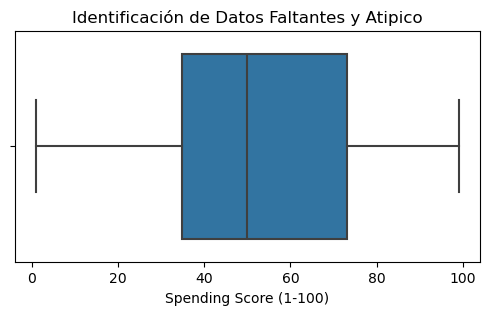

In [11]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=DatMall ['Spending Score (1-100)'])
plt.title('Identificación de Datos Faltantes y Atipico', fontsize=12)

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atipico')

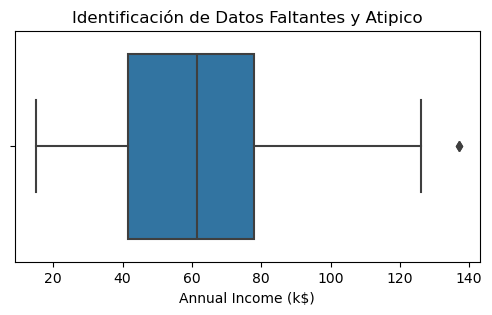

In [12]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=DatMall ['Annual Income (k$)'])
plt.title('Identificación de Datos Faltantes y Atipico', fontsize=12)

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atipico')

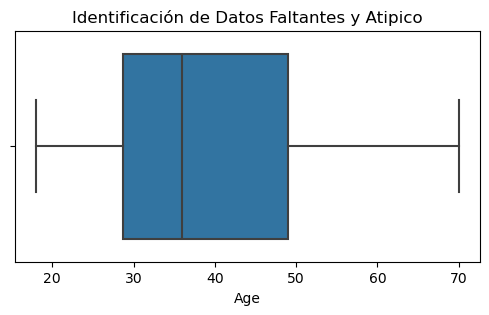

In [13]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=DatMall ['Age'])
plt.title('Identificación de Datos Faltantes y Atipico', fontsize=12)

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atipico')

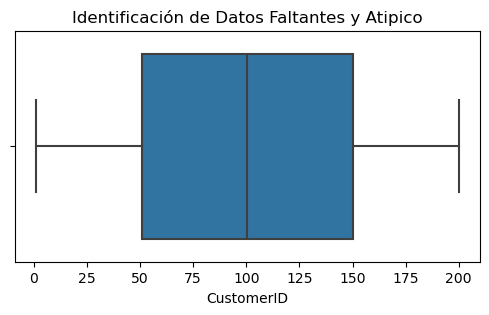

In [14]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=DatMall ['CustomerID'])
plt.title('Identificación de Datos Faltantes y Atipico', fontsize=12)

In [15]:
Data=DatMall.drop(['Spending Score (1-100)'], axis=1)

In [16]:
# Se realiza la lectura de datos
DatMall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
#Se utiliza para contar el número de valores faltantes en cada columna del DataFrame
DatMall.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [18]:
#se utiliza para eliminar filas de un DataFrame que contengan valores faltantes (NaN)
DatMall.dropna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


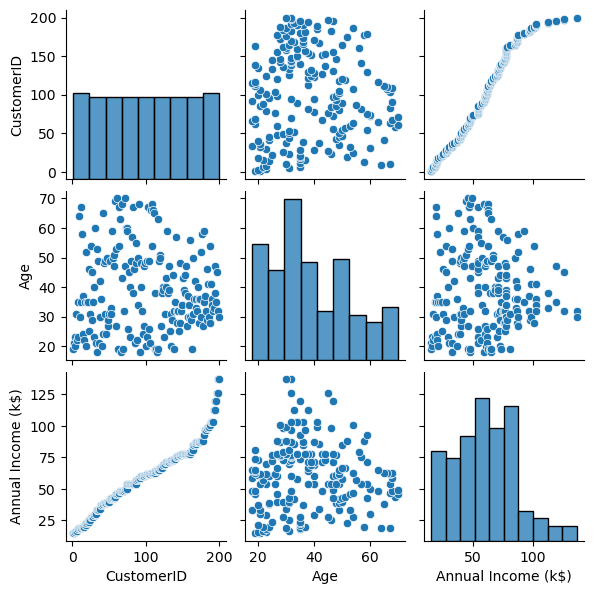

In [19]:
# Se utiliza para crear una matriz de gráficos de dispersión que muestra la relación entre las variables y elimina las filas que contienen valores faltantes
sns.pairplot(Data.dropna(), size=2, kind='scatter')

In [20]:
# Validacion Datos Faltantes
print("Personas con edad igual a cero:", DatMall["Age"].isin([0]).sum())
print("Personas con sueldo igual a cero:", DatMall["Annual Income (k$)"].isin([0]).sum())
print("Personas con puntuacion igual a cero:", DatMall["Spending Score (1-100)"].isin([0]).sum())

Personas con edad igual a cero: 0
Personas con sueldo igual a cero: 0
Personas con puntuacion igual a cero: 0


In [21]:
# Contar Datos Atipicos
nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((DatMall['Annual Income (k$)']<nivel_minimo)|(DatMall['Annual Income (k$)'])>nivel_maximo).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [22]:
# Revisión del tipo de datos y Datos Faltantes

DatMall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [23]:
DatMall = pd.read_csv(r'C:\Users\Administrator\Mall_Customers.csv')

In [24]:
data=DatMall.drop(['Spending Score (1-100)'], axis=1)

In [25]:
# lectura de datos
DatMall.head(200)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [26]:
DatMall = DatMall[["Spending Score (1-100)"]]
DatMall.head()

,Spending Score (1-100)
0,39
1,81
2,6
3,77
4,40


In [27]:
DatMall = pd.read_csv(r'C:\Users\Administrator\Mall_Customers.csv')
data=DatMall.drop(['Spending Score (1-100)'], axis=1)
DatMall = DatMall[["Annual Income (k$)"]]
DatMall.head()

,Annual Income (k$)
0,15
1,15
2,16
3,16
4,17


In [28]:
DatMall = pd.read_csv(r'C:\Users\Administrator\Mall_Customers.csv')
data=DatMall.drop(['Age'], axis=1)
DatMall = DatMall[["Age"]]
DatMall.head()

,Age
0,19
1,21
2,20
3,23
4,31


In [29]:
DatMall = pd.read_csv(r'C:\Users\Administrator\Mall_Customers.csv')
data=DatMall.drop(['Gender'], axis=1)
DatMall = DatMall[["Gender"]]
DatMall.head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female


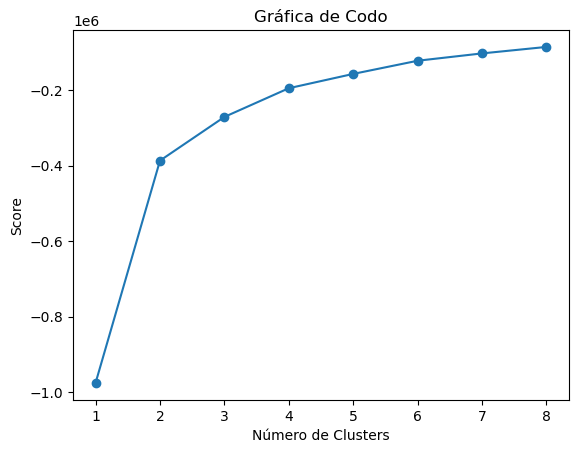

In [32]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


DatMall = pd.read_csv(r'C:\Users\Administrator\Mall_Customers.csv')  

# Eliminar variables no numéricas (por ejemplo, 'Gender')
Datos_numericos = DatMall.drop(columns=['Gender'])

# Asegurarse de que no haya valores faltantes
Datos_numericos = Datos_numericos.dropna()


Nc = range(1, 9)
Kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [Kmeans[i].fit(Datos_numericos).score(Datos_numericos) for i in range(len(Kmeans))]

# Graficar el número de clusters versus el score
plt.plot(Nc, score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()


In [35]:
# Modelo de agrupamiento
from sklearn.cluster import KMeans
import pandas as pd


DatMall = pd.read_csv(r'C:\Users\Administrator\Mall_Customers.csv')  


DatMall = pd.get_dummies(DatMall)

# Eliminar cualquier fila que contenga valores faltantes (NaN)
DatMall = DatMall.dropna()

# Modelo de agrupamiento
Modelo = KMeans(n_clusters=5, random_state=0)
Modelo.fit(DatMall)


KMeans(n_clusters=5, random_state=0)

In [36]:
Proporciona las etiquetas de cluster asignadas a cada muestra después de ajustar un modelo de clustering, como el algoritmo KMeans.
Modelo.labels_
DatMall["Detalle"] = Modelo.labels_
print (DatMall)

     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1   19                  15                      39   
1             2   21                  15                      81   
2             3   20                  16                       6   
3             4   23                  16                      77   
4             5   31                  17                      40   
..          ...  ...                 ...                     ...   
195         196   35                 120                      79   
196         197   45                 126                      28   
197         198   32                 126                      74   
198         199   32                 137                      18   
199         200   30                 137                      83   

     Gender_Female  Gender_Male  Detalle  
0            False         True        0  
1            False         True        0  
2             True        False        4  
3          

In [38]:
#permite realizar análisis adicionales sobre tus datos, como visualizaciones o evaluaciones de la calidad del clustering, utilizando las etiquetas de cluster como referencia.
Observaciones = len(DatMall)
X = DatMall.drop("Detalle", axis=1)
clusters = DatMall["Detalle"]

In [39]:
#Se calculan las metricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score (X, clusters)

In [40]:
#Tabla de valores de Metricas

table_data = [

            ["# Observaciones", Observaciones],
            ["Coeficiente Silhouette", sil_score],
            ["Indice Calinski", calinski_score],
            ["Indice Davies", davies_score]
            ]

In [41]:
#Mostrar Tabla

from tabulate import tabulate
print(tabulate(table_data,headers = ["Metric","Value"], tablefmt = 'pretty'))

+------------------------+--------------------+
|         Metric         |       Value        |
+------------------------+--------------------+
|    # Observaciones     |        200         |
| Coeficiente Silhouette | 0.4229912989681408 |
|    Indice Calinski     | 253.7732123966993  |
|     Indice Davies      | 0.8613716521065248 |
+------------------------+--------------------+


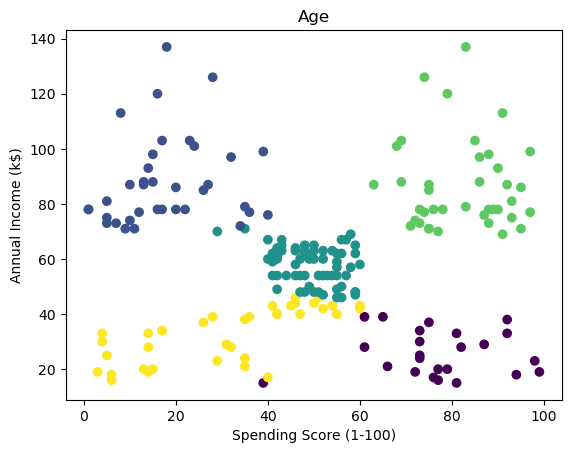

In [43]:
plt.scatter(DatMall['Spending Score (1-100)'], DatMall['Annual Income (k$)'], c=DatMall['Detalle'], cmap='viridis')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.title('Age')
plt.show()

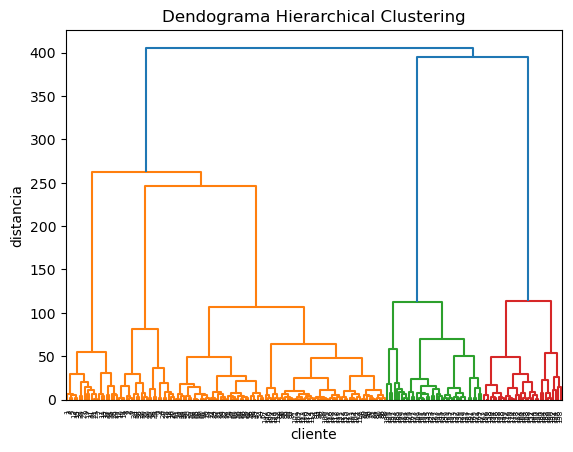

In [47]:
# clustering Jerárquico( Jerarquia de clusters)
# importacion de librerias
# Imprimos los ingresos anuelaes y la puntacion de los gastos del cliente
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv(r'C:\Users\Administrator\Mall_Customers.csv')

d = dataset.iloc[:, [3,4]].values
# creamos el dandograma.
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(d, method = 'ward'))
plt.title('Dendograma Hierarchical Clustering')
plt.xlabel('Cliente')
plt.ylabel('distancia')
plt.show()

# Ajustando Clustering Jerárquico al conjunto de datos
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, 
                    metric = 'euclidean', 
                    linkage = 'ward')

y_hc = hc.fit_predict(d)


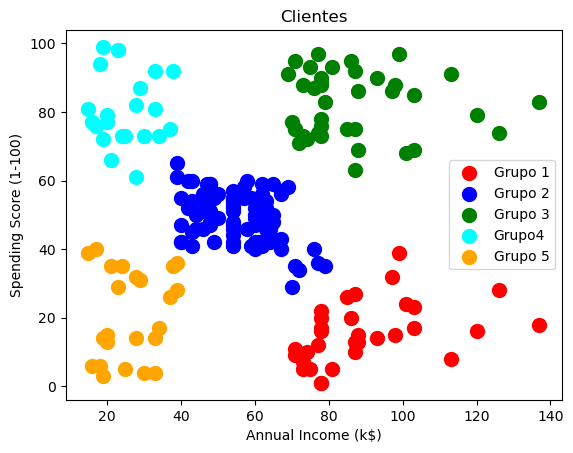

In [48]:
# Visualising the clusters
plt.scatter(d[y_hc == 0, 0], d[y_hc == 0, 1], s = 100, c = 'red', label = 'Grupo 1')
plt.scatter(d[y_hc == 1, 0], d[y_hc == 1, 1], s = 100, c = 'blue', label = 'Grupo 2')
plt.scatter(d[y_hc == 2, 0], d[y_hc == 2, 1], s = 100, c = 'green', label = 'Grupo 3')
plt.scatter(d[y_hc == 3, 0], d[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Grupo4')
plt.scatter(d[y_hc == 4, 0], d[y_hc == 4, 1], s = 100, c = 'orange', label = 'Grupo 5')
plt.title('Clientes')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()